In [1]:
import numpy as np
import tensorflow as tf
from six.moves import cPickle as pickle
from six.moves import range

import matplotlib.pyplot as plt

import os
import sys

from IPython.display import display, Image

from scipy import ndimage

import random
import cv2 
from sklearn.model_selection import train_test_split
%matplotlib inline
os.environ['CUDA_VISIBLE_DEVICES'] = '1'
def show_img(img):
    fig = plt.gcf()
    fig.set_size_inches(18.5, 10.5)
    if len(img.shape) == 3:
        plt.imshow(img)
    else:
        img2 = img
        plt.imshow(img2, cmap='gray')
        plt.show()

# Get three channel data

In [2]:
%load_ext autoreload
%autoreload 2
from utils.preprocess_utils import *

In [3]:
shape = (64, 64)
channel = 3
data = generate_data_set_for_training(shape, channel)

dataset: (86345, 64, 64, 3)
labels: (86345, 6)
dataset: (13066, 64, 64, 3)
labels: (13066, 6)


In [4]:
X_train = data['X_train']
X_val = data['X_val']
y_train = data['y_train']
y_val = data['y_val']
X_test = data['X_test']
y_test = data['y_test']

# Try pretrianed Vgg

In [5]:
import numpy as np
import os
import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, Activation,BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.metrics import categorical_accuracy
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
from keras import regularizers
import keras.utils as ku
from keras import backend as K
from keras import optimizers
import tensorflow as tf
import pickle
import matplotlib.pyplot as ply

Using TensorFlow backend.


# vgg_pretrain_result

#  detection

In [6]:
model = load_model('saved_models/VGGPreTrained.classifier.hdf5')

In [7]:
%load_ext autoreload
%autoreload 2
from keras.models import load_model
from utils.detection_utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


cropped_size 19


 40%|████      | 4/10 [00:00<00:00, 38.11it/s]

**************************************************
pyramid_level:  0
**************************************************
pyramid_level:  1
**************************************************
pyramid_level:  2
**************************************************
pyramid_level:  3
**************************************************
pyramid_level:  4


100%|██████████| 10/10 [00:01<00:00,  9.32it/s]

**************************************************
pyramid_level:  5
**************************************************
pyramid_level:  6
**************************************************
pyramid_level:  7
**************************************************
pyramid_level:  8
**************************************************
pyramid_level:  9
len bbox 27
start to find bbox.
[3 1]
81.8287181854248


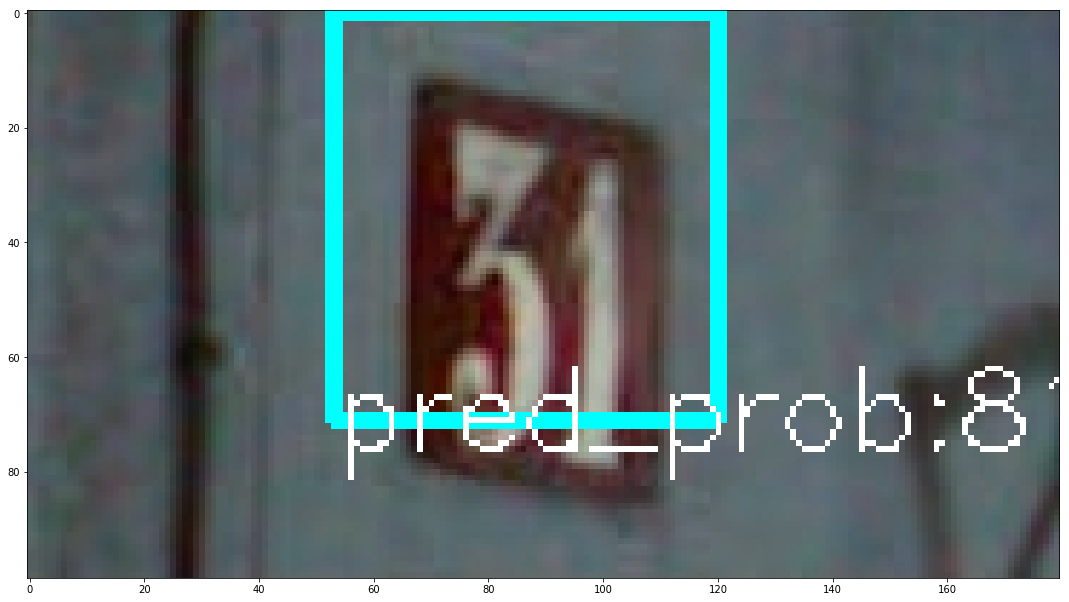

In [8]:
img = cv2.imread('data/train/10096.png')
show_img(img)
show_img(detect_bbox(img, minimal_pic_factor=5,pyramid_scale_step=0.75, save_img=False))

cropped_size 120


  0%|          | 0/6 [00:00<?, ?it/s]

**************************************************
pyramid_level:  0


 17%|█▋        | 1/6 [00:31<02:37, 31.56s/it]

**************************************************
pyramid_level:  1


 33%|███▎      | 2/6 [00:39<01:38, 24.53s/it]

**************************************************
pyramid_level:  2


100%|██████████| 6/6 [00:41<00:00,  6.85s/it]


**************************************************
pyramid_level:  3
**************************************************
pyramid_level:  4
**************************************************
pyramid_level:  5
len bbox 5578
start to find bbox.
[2 9]
92.44913101196289
[4 4 9]
74.17692184448242
CPU times: user 1min 39s, sys: 4.01 s, total: 1min 43s
Wall time: 1min 37s


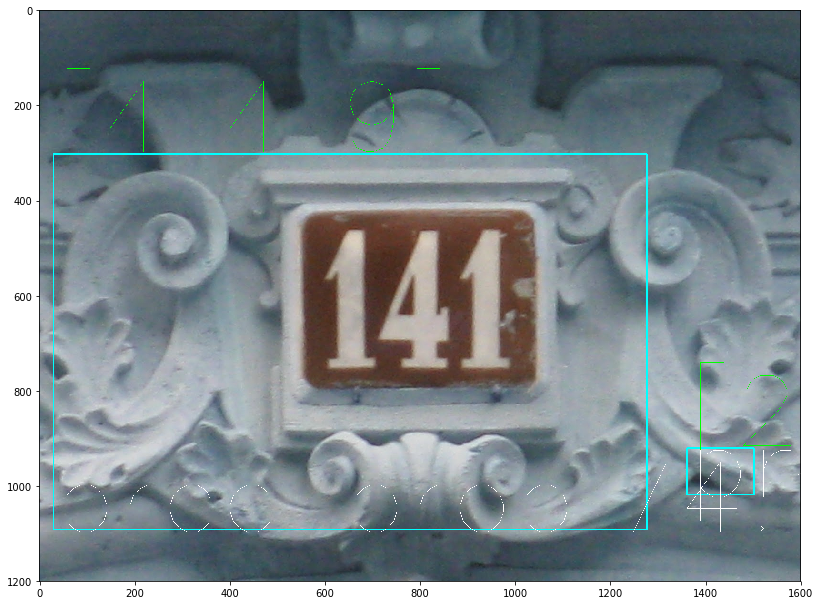

In [18]:
%%time
img = cv2.imread('input_images/7.jpg')
#show_img(img)
img_out = detect_bbox(img, steps=10, minimal_pic_factor=10, pyramid_scale_step=0.5, save_img=False)
show_img(img_out)